Student ID: 20144753

Name: Seung Yeop,Seon

https://github.com/SYseon/Assignment03

# Class KMeans([integer] Number of Point, [integer] Number of Class)

## Variables
### self.n_point =  integer, number of point.
### self.n_cluster = integer, number of cluster.
### self.point_arr =  [number of point , 2 ( two means (x,y) coordinates )] numpy array. containing (x,y) the coordinates of the points
### self.class_center = [number of cluster, 2 ( two means (x,y) coordinates)] numpy array. containing the centroids of the clusters
### self.point_class = [number of point] numpy array. containing cluster values of points.
### self.energy = [number of point, number of cluster] numpy array. containing distance between the centroids and the points. ***i do not create comput_energy method. In my variable setting, if i create those function, it  requires more time to perform. 

## Functions
## [generate_point_arr]
### - generating points randomly
## [measure_center]
### -measuring the center of clusters. if (x,y) coordinates have nan values, those values are changed to zeros. if all of centers equal to previous. this method returns Flase. In the opposite case, returns True.
## [measure_label]
### -measuring between the centroids and the points and changing the labels.  if all of labels equal to previous. this method returns Flase. In the opposite case, returns True.
## [activate]
### -showing the graph and activating methods. Determine whether algorithms cease or not.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans():
    
    def __init__(self, n_point, n_cluster):
        self.n_point=n_point
        self.n_cluster=n_cluster
        self.point_arr=self.generate_point_arr()
        self.class_center=np.empty([n_cluster, 2])
        self.point_class=np.random.randint(0, self.n_cluster, self.n_point)
        self.energy=np.empty([self.n_point, self.n_cluster])
        
    def generate_point_arr(self):
        temp=np.random.random((self.n_point, self.n_point))
        temp=temp*100
        p=np.zeros([self.n_point, 2])
        p.T[0]=temp[0]
        p.T[1]=temp[1]
        return p
    
    def measure_center(self):  
        temp=np.empty([self.n_cluster, 2])
        for i in range(self.n_cluster):
            distance_arr=np.isclose(i,self.point_class)
            temp[i][0]=np.dot(self.point_arr.T[0],distance_arr.T)/distance_arr.sum()
            temp[i][1]=np.dot(self.point_arr.T[1],distance_arr.T)/distance_arr.sum()
            if np.isnan(temp[i][0]):
                temp[i][0]=0
            if np.isnan(temp[i][1]):
                temp[i][1]=0
      
        if np.all(temp==self.class_center):
            return False
        self.class_center=temp
        return True
    
    
    def measure_label(self):
        temp=self.point_class
        for i in range(self.n_point):
            for j in range(self.n_cluster):
                self.energy[i][j]=(((self.point_arr[i]-self.class_center[j])**2).sum())**(1/2)
                if(self.energy[i][j]==self.energy[i].min()):
                    temp[i]=j
        if np.all(temp==self.point_class):
            return False
        self.point_class=temp
        print(self.energy)
        return True
    
    
    def activate(self):
        temp=(True,True)
        i=1
        while(any(temp)):
            temp=self.measure_center(), self.measure_label()
            print(i,'th energy (m,n) array is (m = number of points, n = number of cluster) \n',self.energy)
            i=i+1
        for i in range(self.n_cluster):
            x=np.where(np.isclose(i,self.point_class), self.point_arr.T[0], None)
            y=np.where(np.isclose(i,self.point_class), self.point_arr.T[1], None)
            plt.scatter(x, y, marker='v', label='cluster %d' %i)
            

1 th energy (m,n) array is (m = number of points, n = number of cluster) 
 [[17.90117504 30.83446167 23.15804194 ... 18.34238957 22.81694356
  14.25076687]
 [41.81780662 27.7106144  35.4783979  ... 41.77810789 37.19518312
  44.27654883]
 [65.32659343 51.32923003 56.48774827 ... 65.62957622 61.74780908
  65.60069007]
 ...
 [51.06849866 51.76053924 56.17542195 ... 50.19883469 48.42554285
  56.54044057]
 [23.78862736 10.21654186 15.21089694 ... 24.10317322 20.40176859
  24.44557997]
 [43.79125795 54.86870892 53.15837075 ... 43.0878801  45.31681256
  46.99319863]]
2 th energy (m,n) array is (m = number of points, n = number of cluster) 
 [[16.20289139 37.08340552 25.82881532 ... 17.02925795 24.36538897
  15.4013061 ]
 [42.8934453  23.27312142 33.1925046  ... 43.35109745 34.1982478
  43.33709193]
 [65.57995112 42.25738444 53.42167935 ... 67.12068358 56.93884574
  65.40706728]
 ...
 [53.18276657 59.7201889  57.51853604 ... 50.52936977 52.72172158
  54.69135235]
 [24.09725456  1.36056178 12.3

C:\Users\cal_00\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\cal_00\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


3 th energy (m,n) array is (m = number of points, n = number of cluster) 
 [[14.54625909 54.15804651 26.0346287  ... 22.74640027 21.74909928
  15.9832975 ]
 [44.54372613 20.27439287 33.87994359 ... 37.68555936 37.16878026
  42.56203001]
 [66.98383115 24.28215078 52.6322939  ... 62.49648145 60.4300783
  64.16878655]
 ...
 [54.0046893  72.5993978  60.06320953 ... 47.73646654 51.51100244
  55.62416727]
 [25.55661231 18.00210226 12.33491547 ... 21.20576723 18.89676562
  22.89603707]
 [44.30397622 82.88993394 58.11729059 ... 44.42577274 47.76638898
  47.39320948]]
4 th energy (m,n) array is (m = number of points, n = number of cluster) 
 [[17.30838929 59.77400936 31.34580909 ... 21.5009812  23.08561636
  12.30415966]
 [41.97041555 21.46881123 31.14231249 ... 38.73753784 35.50029828
  46.23554549]
 [65.01282493 18.67244429 47.09350941 ... 63.21038666 58.1641531
  66.73411371]
 ...
 [52.22799308 76.19393818 63.93553451 ... 48.55770852 52.84440592
  58.77527335]
 [23.48895205 23.48714107  9.32

19 th energy (m,n) array is (m = number of points, n = number of cluster) 
 [[12.10153307 68.53001793 48.94402529 ... 18.91068122 28.22445994
  21.28958058]
 [64.05369948 28.37284741 36.46425793 ... 41.0327961  34.91801418
  75.53844136]
 [87.08677424 11.00939787 35.26342502 ... 64.86792275 50.33687264
  90.07648336]
 ...
 [58.54683823 84.55380856 82.91447995 ... 50.20197181 65.29110378
  85.12724282]
 [45.72318807 32.94926098 23.85246431 ... 23.34466334 13.03027707
  53.79125266]
 [33.41511652 97.61410219 85.4641701  ... 43.68353004 63.08285042
  60.41991629]]
20 th energy (m,n) array is (m = number of points, n = number of cluster) 
 [[12.10153307 68.53001793 48.94402529 ... 18.40915839 27.54247689
  21.78445621]
 [64.05369948 28.37284741 36.46425793 ... 41.36106642 35.53450151
  75.99219432]
 [87.08677424 11.00939787 35.26342502 ... 64.99111978 51.03608261
  90.43662462]
 ...
 [58.54683823 84.55380856 82.91447995 ... 50.73521335 65.29736549
  85.60604822]
 [45.72318807 32.94926098 2

35 th energy (m,n) array is (m = number of points, n = number of cluster) 
 [[12.69881524 69.72067252 48.53934839 ... 14.32946365 25.72169074
  25.44540867]
 [66.87622923 29.71188482 39.15685755 ... 45.95201179 37.06596697
  79.77871237]
 [89.37610683 10.42563175 37.52688262 ... 69.19660797 52.88226754
  93.77780255]
 ...
 [61.43911294 85.96217445 84.75055899 ... 52.22192296 65.16026286
  88.99502016]
 [48.16331222 34.32524872 25.71715103 ... 27.67942788 15.12850016
  57.98863393]
 [34.74242103 99.03411503 86.1283218  ... 41.51340777 61.44972751
  63.09894107]]
36 th energy (m,n) array is (m = number of points, n = number of cluster) 
 [[12.69881524 69.72067252 48.53934839 ... 14.32946365 25.72169074
  25.44540867]
 [66.87622923 29.71188482 39.15685755 ... 45.95201179 37.06596697
  79.77871237]
 [89.37610683 10.42563175 37.52688262 ... 69.19660797 52.88226754
  93.77780255]
 ...
 [61.43911294 85.96217445 84.75055899 ... 52.22192296 65.16026286
  88.99502016]
 [48.16331222 34.32524872 2

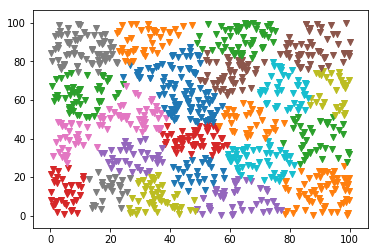

In [13]:
kmeans=KMeans(1000,23)
kmeans.activate()